<a href="https://colab.research.google.com/github/brindhasenthilkumar/fmml2021/blob/main/Mod5_ClassificationII_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1
# Classification II : Introduction to Decision Trees

```
Module Coordinator : Bhuvanesh Sridharan
```

Decision Trees are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of some property by inferring simple decision rules from the data features.


Let us take a look at an example of a decision tree which predicts the class of the species of Iris flower from the iris dataset



In [88]:
#Importing the necessary packages

from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
import pandas
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt


### Code for the core experiment: 

- Creating the decision tree classifier based on parameters passed.
- Evaluating the classifier's accuracy and plotting its confusion matrix.
- Plotting its decision boundary.
- Creating and showing the visualization of the tree made.

**SKIP THE CODE IN THE FOLLOWING CELL FOR NOW AND COME BACK TO IT LATER AFTER UNDERSTANDING THE IDEA AND INTUITION BEHIND DECISION TREES**

In [ ]:
def performExperiment(trainSet : tuple, testSet : tuple, max_depth : int = None, feature_names : list = None, class_names : list = None, criterion = "gini", min_samples_split : int = 2 , min_samples_leaf = 1):
  #Importing the Decision tree classifier from sklearn:

  clf = tree.DecisionTreeClassifier(max_depth = max_depth, \
                                    criterion = criterion,\
                                    min_samples_split = min_samples_split,\
                                    min_samples_leaf = min_samples_leaf,\
                                    splitter = "best",\
                                    random_state = 0,\
                                    )
  X_train, y_train = trainSet
  X_test, y_test = testSet

  clf = clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  print("Accuracy of the decision tree on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))

  print("The confusion matrix is : ")
  plot_confusion_matrix(clf, X_test, y_test, display_labels=class_names)


  print("Here is a diagram of the tree created to evaluate each sample:")
  fig, ax = plt.subplots(figsize=(12,10))
  imgObj = tree.plot_tree(clf, filled=True, ax=ax, feature_names = feature_names, class_names = class_names, impurity=False, proportion=True, rounded=True, fontsize = 12)
  plt.show()


def giveAnExample(n : int):
  performExperiment((X_train, y_train),  (X_test, y_test), feature_names = iris["feature_names"], class_names = iris["target_names"], max_depth = n)

def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))
  
  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(8,6))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  plt.title("Decision Boundary for two features used in Decision Tree")
  # plt.legend()
  plt.show()

## Loading IRIS Dataset:

### About the IRIS dataset:

The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). We shall be using decision trees to try to predict the correct species of the flower using these four features

In [114]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
irisData = pandas.DataFrame(\
    data = np.hstack((X,y.reshape(y.shape[0], 1), [[iris["target_names"][int(classIdx)]] for classIdx in y])), \
    columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', "Class", "ClassName"])
irisData.sample(n = 10, random_state = 1)

#Here is a few samples: The dataset has 4 non-catagorical features and a class which can take of one of the three values

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
14,5.8,4.0,1.2,0.2,0,setosa
98,5.1,2.5,3.0,1.1,1,versicolor
75,6.6,3.0,4.4,1.4,1,versicolor
16,5.4,3.9,1.3,0.4,0,setosa
131,7.9,3.8,6.4,2.0,2,virginica
56,6.3,3.3,4.7,1.6,1,versicolor
141,6.9,3.1,5.1,2.3,2,virginica
44,5.1,3.8,1.9,0.4,0,setosa
29,4.7,3.2,1.6,0.2,0,setosa
120,6.9,3.2,5.7,2.3,2,virginica


## Example of DT on Iris dataset with performace evaluation, and tree structure

Accuracy of the decision tree on the test set: 

0.895


The confusion matrix is : 
Here is a diagram of the tree created to evaluate each sample:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


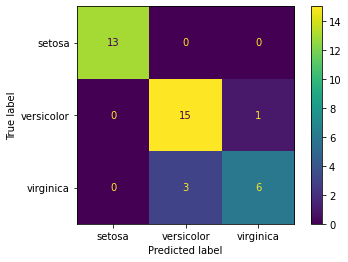

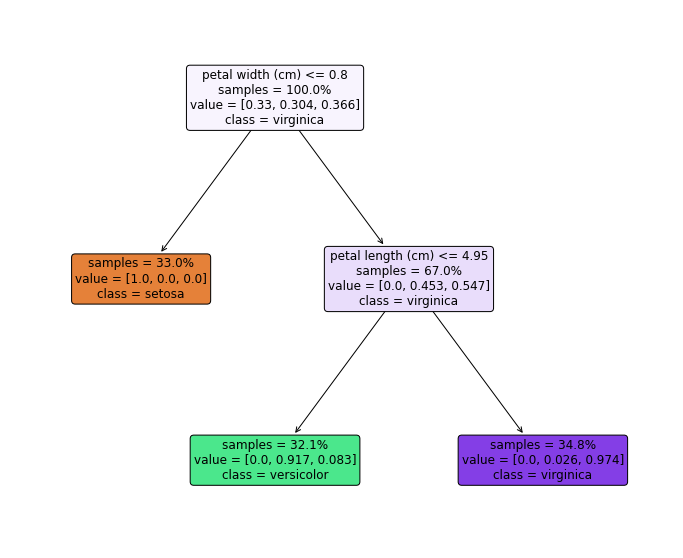

In [ ]:
giveAnExample(2)

### Exercise 1:
 Kindly use the above tree to evaluate the classes for the following examples and verify what percent of them are classified correctly by the tree:

In [ ]:
irisData.sample(n = 5, random_state=0)

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
114,5.8,2.8,5.1,2.4,2,virginica
62,6.0,2.2,4.0,1.0,1,versicolor
33,5.5,4.2,1.4,0.2,0,setosa
107,7.3,2.9,6.3,1.8,2,virginica
7,5.0,3.4,1.5,0.2,0,setosa


Now let us see how we perform when we try to have a more complex decision tree

Accuracy of the decision tree on the test set: 

0.974


The confusion matrix is : 
Here is a diagram of the tree created to evaluate each sample:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


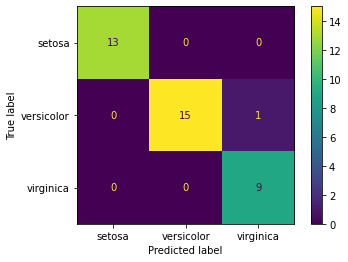

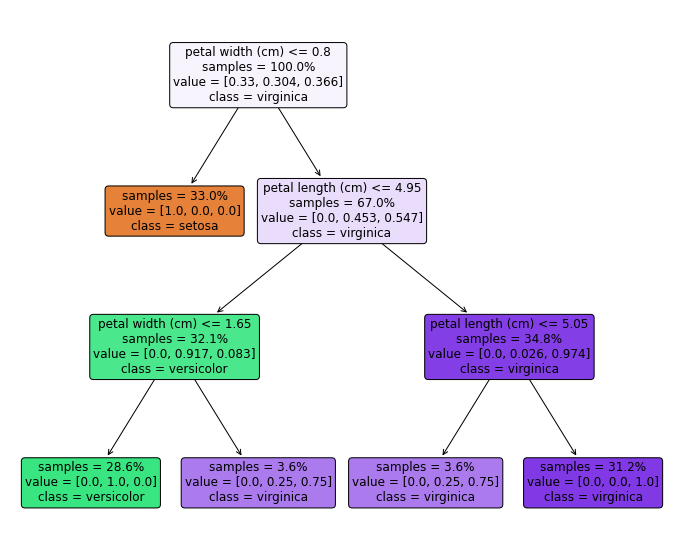

In [ ]:
giveAnExample(3)

### Exercise 2:
Repeat Exercise 1 for the above tree as well.


---

We observe that even though that the tree had four features available to it, the tree uses only two of them to classify the cases of species. It gives us an idea that those two features chosen are performing quite decently. Let us examine the decision boundary generated by the tree when only those two features namely **petal length and petal width** are used

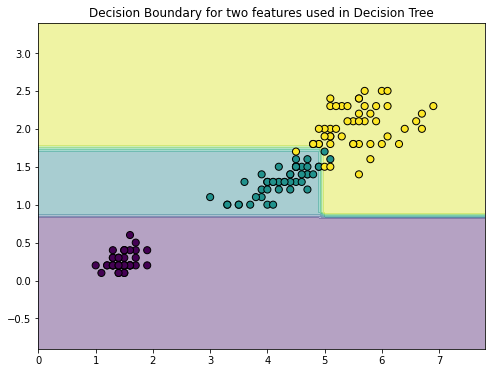

In [ ]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)
pair = [2, 3]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [2, 3], clf)

**Decision boundary** with considering **sepal width and length**:

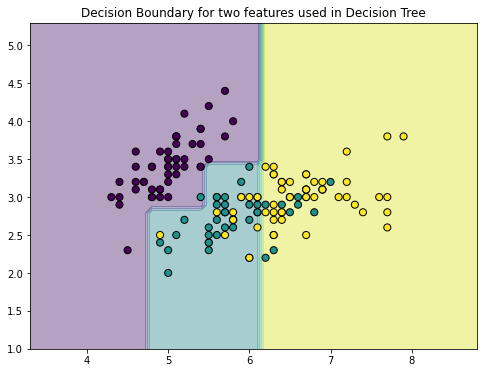

In [ ]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

**Decision boundary** with considering **sepal length and pedal length**:

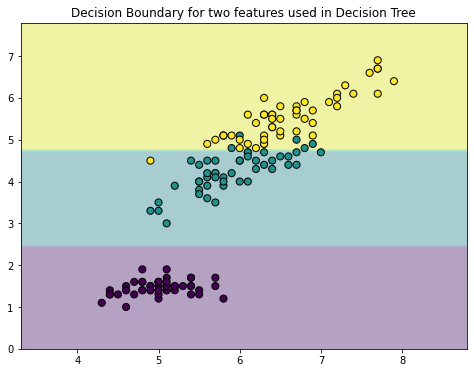

In [ ]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)
pair = [0, 2]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

**Decision boundary** with considering **sepal width and pedal width**:

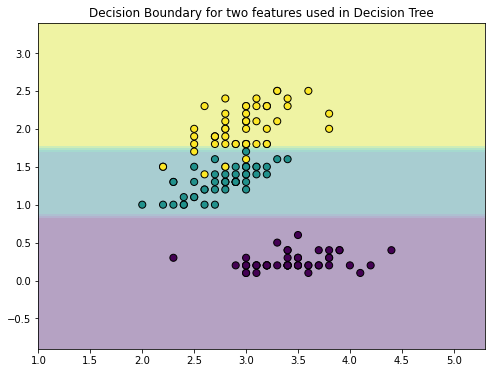

In [ ]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)
pair = [1, 3]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

Results of decision boundaries for depth = 2


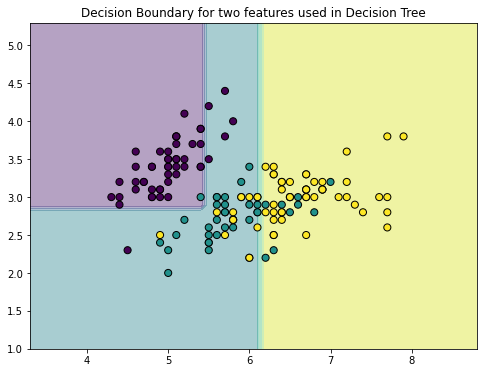

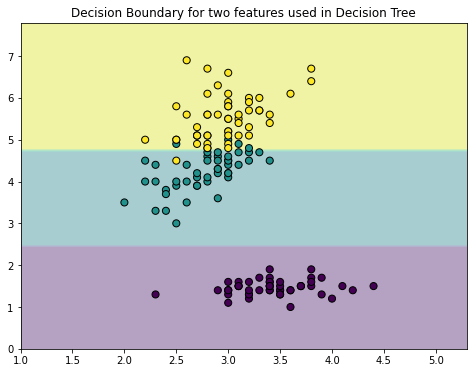

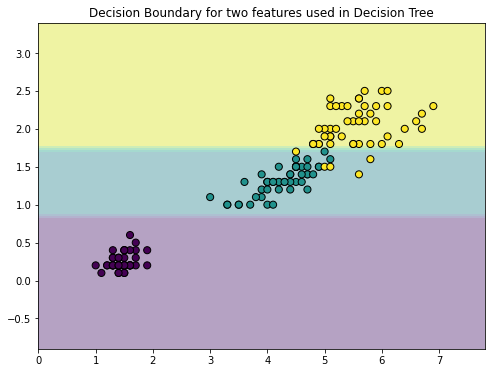

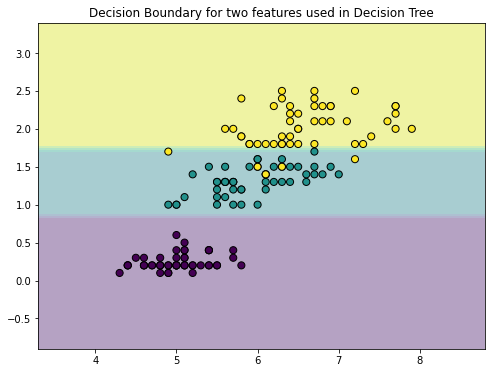

In [ ]:
print("Results of decision boundaries for depth = 2")
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 2)
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

pair = [1, 2]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

pair = [2, 3]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

pair = [0, 3]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

Results of decision boundaries for depth = 5


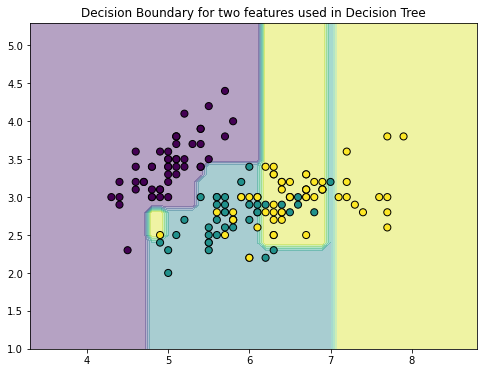

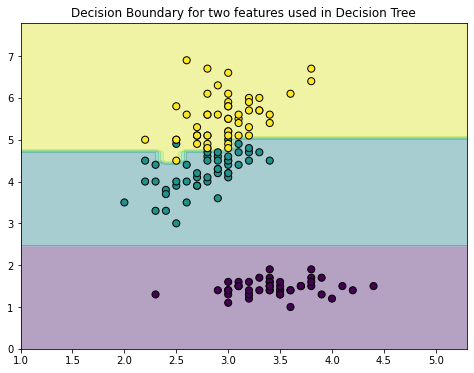

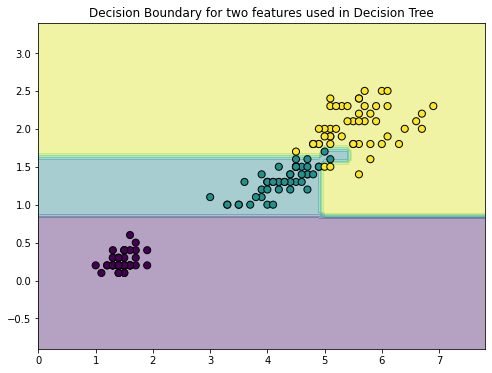

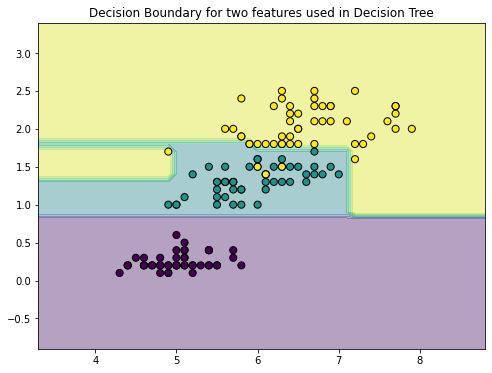

In [ ]:
print("Results of decision boundaries for depth = 5")
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 5)
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

pair = [1, 2]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

pair = [2, 3]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

pair = [0, 3]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

Results of decision boundaries for depth = 10


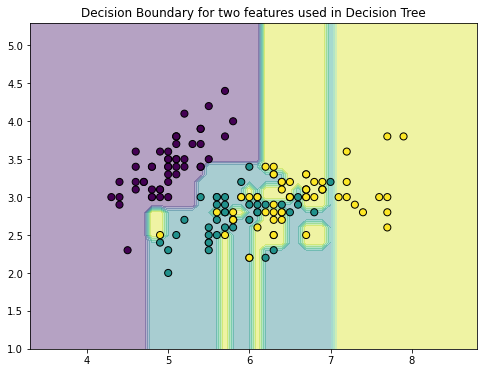

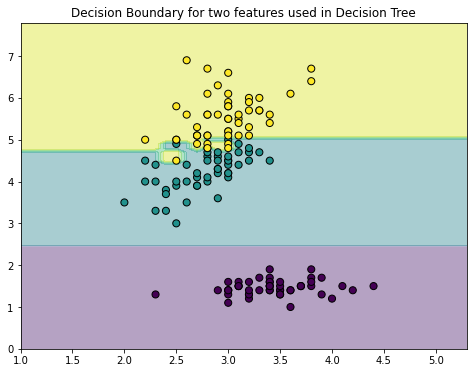

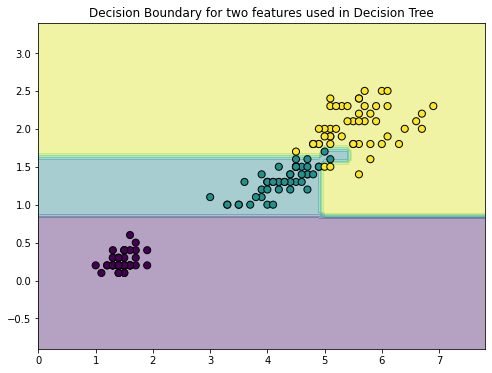

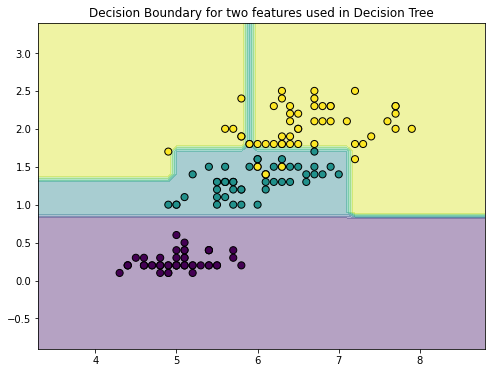

In [ ]:
print("Results of decision boundaries for depth = 10")
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 10)
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

pair = [1, 2]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

pair = [2, 3]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

pair = [0, 3]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

---

### Exercise 3:

#### 3.1 :
We see that the above decision boundaries are with depth of 3. Compare the above boundary with trees that have higher complexity (by changing the value of `max_depth`) and then pause and ponder.

Test with `max_depth` of the following values:
- 2
- 5
- 10


What do you observe?


**Ans: When the depth is increased the decision boundaries are not rectangular. The deeper the depth the overfitting is very evident, each and every samples is trying to get classified properly during the training** 

**When a tree with depth = 2, features 2 and 3, 3 and 4 and 1 and 4 has good classification between the classes**


#### 3.2 :

On a closer look, we see that the decision boundaries' lines are always at a right angle to the principle axes. Can you reason on why is that the case? \
`(Hint: How is a decision made at any node?)`

Ans: the split of the nodes were taken place on the right child of the parent node.

---

### Exercise 4:

Complete the following function predict: which takes in four variables : `sepal width, sepal length, petal width, petal length` and returns the class of the flower. Use the decision tree made in Exercise 2 and realise the logic using multiple nested `if else` statements. 

In [ ]:
iris = load_iris()
X, y = iris.data, iris.target
for i in range(50):
  print(X[i], "and", y[i])

[5.1 3.5 1.4 0.2] and 0
[4.9 3.  1.4 0.2] and 0
[4.7 3.2 1.3 0.2] and 0
[4.6 3.1 1.5 0.2] and 0
[5.  3.6 1.4 0.2] and 0
[5.4 3.9 1.7 0.4] and 0
[4.6 3.4 1.4 0.3] and 0
[5.  3.4 1.5 0.2] and 0
[4.4 2.9 1.4 0.2] and 0
[4.9 3.1 1.5 0.1] and 0
[5.4 3.7 1.5 0.2] and 0
[4.8 3.4 1.6 0.2] and 0
[4.8 3.  1.4 0.1] and 0
[4.3 3.  1.1 0.1] and 0
[5.8 4.  1.2 0.2] and 0
[5.7 4.4 1.5 0.4] and 0
[5.4 3.9 1.3 0.4] and 0
[5.1 3.5 1.4 0.3] and 0
[5.7 3.8 1.7 0.3] and 0
[5.1 3.8 1.5 0.3] and 0
[5.4 3.4 1.7 0.2] and 0
[5.1 3.7 1.5 0.4] and 0
[4.6 3.6 1.  0.2] and 0
[5.1 3.3 1.7 0.5] and 0
[4.8 3.4 1.9 0.2] and 0
[5.  3.  1.6 0.2] and 0
[5.  3.4 1.6 0.4] and 0
[5.2 3.5 1.5 0.2] and 0
[5.2 3.4 1.4 0.2] and 0
[4.7 3.2 1.6 0.2] and 0
[4.8 3.1 1.6 0.2] and 0
[5.4 3.4 1.5 0.4] and 0
[5.2 4.1 1.5 0.1] and 0
[5.5 4.2 1.4 0.2] and 0
[4.9 3.1 1.5 0.2] and 0
[5.  3.2 1.2 0.2] and 0
[5.5 3.5 1.3 0.2] and 0
[4.9 3.6 1.4 0.1] and 0
[4.4 3.  1.3 0.2] and 0
[5.1 3.4 1.5 0.2] and 0
[5.  3.5 1.3 0.3] and 0
[4.5 2.3 1.3 0.3

In [ ]:
for i in range(50, 100, 1):
  print(X[i], "and", y[i])

[7.  3.2 4.7 1.4] and 1
[6.4 3.2 4.5 1.5] and 1
[6.9 3.1 4.9 1.5] and 1
[5.5 2.3 4.  1.3] and 1
[6.5 2.8 4.6 1.5] and 1
[5.7 2.8 4.5 1.3] and 1
[6.3 3.3 4.7 1.6] and 1
[4.9 2.4 3.3 1. ] and 1
[6.6 2.9 4.6 1.3] and 1
[5.2 2.7 3.9 1.4] and 1
[5.  2.  3.5 1. ] and 1
[5.9 3.  4.2 1.5] and 1
[6.  2.2 4.  1. ] and 1
[6.1 2.9 4.7 1.4] and 1
[5.6 2.9 3.6 1.3] and 1
[6.7 3.1 4.4 1.4] and 1
[5.6 3.  4.5 1.5] and 1
[5.8 2.7 4.1 1. ] and 1
[6.2 2.2 4.5 1.5] and 1
[5.6 2.5 3.9 1.1] and 1
[5.9 3.2 4.8 1.8] and 1
[6.1 2.8 4.  1.3] and 1
[6.3 2.5 4.9 1.5] and 1
[6.1 2.8 4.7 1.2] and 1
[6.4 2.9 4.3 1.3] and 1
[6.6 3.  4.4 1.4] and 1
[6.8 2.8 4.8 1.4] and 1
[6.7 3.  5.  1.7] and 1
[6.  2.9 4.5 1.5] and 1
[5.7 2.6 3.5 1. ] and 1
[5.5 2.4 3.8 1.1] and 1
[5.5 2.4 3.7 1. ] and 1
[5.8 2.7 3.9 1.2] and 1
[6.  2.7 5.1 1.6] and 1
[5.4 3.  4.5 1.5] and 1
[6.  3.4 4.5 1.6] and 1
[6.7 3.1 4.7 1.5] and 1
[6.3 2.3 4.4 1.3] and 1
[5.6 3.  4.1 1.3] and 1
[5.5 2.5 4.  1.3] and 1
[5.5 2.6 4.4 1.2] and 1
[6.1 3.  4.6 1.4

In [ ]:
for i in range(100, 150, 1):
  print(X[i], "and", y[i])

[6.3 3.3 6.  2.5] and 2
[5.8 2.7 5.1 1.9] and 2
[7.1 3.  5.9 2.1] and 2
[6.3 2.9 5.6 1.8] and 2
[6.5 3.  5.8 2.2] and 2
[7.6 3.  6.6 2.1] and 2
[4.9 2.5 4.5 1.7] and 2
[7.3 2.9 6.3 1.8] and 2
[6.7 2.5 5.8 1.8] and 2
[7.2 3.6 6.1 2.5] and 2
[6.5 3.2 5.1 2. ] and 2
[6.4 2.7 5.3 1.9] and 2
[6.8 3.  5.5 2.1] and 2
[5.7 2.5 5.  2. ] and 2
[5.8 2.8 5.1 2.4] and 2
[6.4 3.2 5.3 2.3] and 2
[6.5 3.  5.5 1.8] and 2
[7.7 3.8 6.7 2.2] and 2
[7.7 2.6 6.9 2.3] and 2
[6.  2.2 5.  1.5] and 2
[6.9 3.2 5.7 2.3] and 2
[5.6 2.8 4.9 2. ] and 2
[7.7 2.8 6.7 2. ] and 2
[6.3 2.7 4.9 1.8] and 2
[6.7 3.3 5.7 2.1] and 2
[7.2 3.2 6.  1.8] and 2
[6.2 2.8 4.8 1.8] and 2
[6.1 3.  4.9 1.8] and 2
[6.4 2.8 5.6 2.1] and 2
[7.2 3.  5.8 1.6] and 2
[7.4 2.8 6.1 1.9] and 2
[7.9 3.8 6.4 2. ] and 2
[6.4 2.8 5.6 2.2] and 2
[6.3 2.8 5.1 1.5] and 2
[6.1 2.6 5.6 1.4] and 2
[7.7 3.  6.1 2.3] and 2
[6.3 3.4 5.6 2.4] and 2
[6.4 3.1 5.5 1.8] and 2
[6.  3.  4.8 1.8] and 2
[6.9 3.1 5.4 2.1] and 2
[6.7 3.1 5.6 2.4] and 2
[6.9 3.1 5.1 2.3

In [ ]:
def predictSpecies(sepal_width, sepal_length, petal_width,  petal_length) -> str :
  if(((sepal_width > 4.3 and sepal_width < 5.8) or (sepal_length > 2.2 and sepal_length < 4.5)) and ((petal_width > 0.9 and petal_width < 2.0) and
     (petal_length > 0.0 and petal_length < 0.7))):
     return("Class Setosa")
     
  if(((sepal_width > 4.9 and sepal_width <= 6.9) and (sepal_length > 1.9 and sepal_length < 3.5)) and ((petal_width > 2.9 and petal_width < 5.0) and
     (petal_length > 0.9 and petal_length < 1.9))):
    return("Class Versicolor")
     
  if(((sepal_width > 5.5 and sepal_width < 8.0) and (sepal_length > 2.1 and sepal_length < 3.9)) and ((petal_width > 4.7 and petal_width < 7.0) and
     (petal_length > 1.3 and petal_length < 2.6))):
    return("Class Virginica")
    
  

In [ ]:
for i in range(150):
  print(i, "and", predictSpecies(float(X[i][0]), float(X[i][1]), float(X[i][2]), float(X[i][3])))

0 and Class Setosa
1 and Class Setosa
2 and Class Setosa
3 and Class Setosa
4 and Class Setosa
5 and Class Setosa
6 and Class Setosa
7 and Class Setosa
8 and Class Setosa
9 and Class Setosa
10 and Class Setosa
11 and Class Setosa
12 and Class Setosa
13 and Class Setosa
14 and Class Setosa
15 and Class Setosa
16 and Class Setosa
17 and Class Setosa
18 and Class Setosa
19 and Class Setosa
20 and Class Setosa
21 and Class Setosa
22 and Class Setosa
23 and Class Setosa
24 and Class Setosa
25 and Class Setosa
26 and Class Setosa
27 and Class Setosa
28 and Class Setosa
29 and Class Setosa
30 and Class Setosa
31 and Class Setosa
32 and Class Setosa
33 and Class Setosa
34 and Class Setosa
35 and Class Setosa
36 and Class Setosa
37 and Class Setosa
38 and Class Setosa
39 and Class Setosa
40 and Class Setosa
41 and Class Setosa
42 and Class Setosa
43 and Class Setosa
44 and Class Setosa
45 and Class Setosa
46 and Class Setosa
47 and Class Setosa
48 and Class Setosa
49 and Class Setosa
50 and Non

In [ ]:
print(predictSpecies(4.9, 2.5, 4.5, 1.7))

None


# Entropy and Information:

## How are decision trees built? 

A decision tree is built top-down from a root node and involves partitioning the data into subsets that contain instances with similar values (homogenous). 
We use entropy to calculate the homogeneity of a sample.

Entropy itself is defined in the following way:

$$E(s) = \sum_{i=1}^c - p_i * log_2(p_i)$$

Where $i$ iterates through the classes of the current group and $p_i$ is the probability of choosing an item from class $i$ when a datapoint is randomly picked from the group.

At anypoint in the process of making the decision tree. All possible methods of dividing the group are considered (across all features and values of separations) and then the division with the most amount of **Information Gain** is used to divide the current group into two. This is done recursively to finally attain a tree. 

Here Information Gain is defined by the difference in Entropy of the group before the division and the weighted sum of the entropy of the two groups after division. 

$$IG(X) = E(s) - E(s, X)$$




In [ ]:
df=irisData.sample(n = 10, random_state = 5)
y=df['ClassName']
X=df.drop('ClassName', axis='columns')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

## Exercise 5:
Calculate the Entropy of the above collection of 10 datapoints.

In [ ]:
def performExperiment(trainSet : tuple, testSet : tuple, max_depth : int = None, feature_names : list = None, class_names : list = None, criterion = "entropy", min_samples_split : int = 2 , min_samples_leaf = 1):
  #Importing the Decision tree classifier from sklearn:

  clf = tree.DecisionTreeClassifier(max_depth = max_depth, \
                                    criterion = "entropy",\
                                    min_samples_split = min_samples_split,\
                                    min_samples_leaf = min_samples_leaf,\
                                    splitter = "best",\
                                    random_state = 1 \
                                    )
  X_train, y_train = trainSet
  X_test, y_test = testSet

  clf = clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  print("Accuracy of the decision tree on the test set using Entropy with tree depth = 2: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))

  print("The confusion matrix is : ")
  plot_confusion_matrix(clf, X_test, y_test, display_labels=class_names)


  print("Here is a diagram of the tree created to evaluate each sample:")
  fig, ax = plt.subplots(figsize=(12,10))
  imgObj = tree.plot_tree(clf, filled=True, ax=ax, feature_names = feature_names, class_names = class_names, impurity=True, proportion=True, rounded=True, fontsize = 12)
  plt.show()


def giveAnExample1(n : int):
  performExperiment((X_train, y_train),  (X_test, y_test), feature_names = iris["feature_names"], class_names = iris["target_names"], max_depth = n)

def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))
  
  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(8,6))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  plt.title("Decision Boundary for two features used in Decision Tree")
  # plt.legend()
  plt.show()

Accuracy of the decision tree on the test set using Entropy with tree depth = 2: 

0.667


The confusion matrix is : 
Here is a diagram of the tree created to evaluate each sample:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


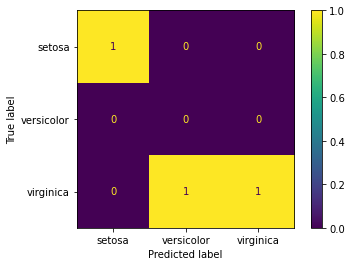

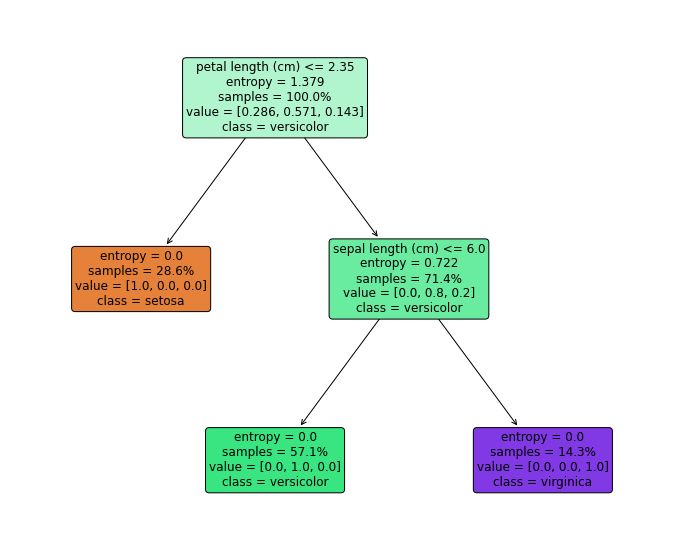

In [ ]:
giveAnExample1(2)

 
## Exercise 6: 
Suggest a decision node (if, else) statement which divides the group into two groups. Also compute the Information Gain in that division step. Compare this with other decision clauses that you can make and intuitively comment on which is better for classification and observe if this has any correlation with the numerical value of Information Gain.

--- 

End of Lab 1

In [9]:
irisData.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'Class',
       'ClassName'],
      dtype='object')

In [115]:
irisData1 = irisData
irisData = irisData.drop(['ClassName'], axis = 1)


In [109]:
irisData

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [136]:
import pandas as pd
import numpy as np
import math

In [218]:
def calc_entropy(column):
  entropy = 0
  counts = np.bincount(column)
  probabilities = counts/len(column)
   
  for prob in probabilities:
    if prob > 0:
      entropy += prob * math.log(prob, 2)
    
  return -entropy


def calc_information_gain(split_name):

  original_entropy = calc_entropy(irisData['Class'])
  values = irisData[split_name].unique()
    
  left_split = irisData[irisData[split_name] == values[0]]
  right_split = irisData[irisData[split_name] == values[1]]
   
  p_entropy = 0

  for subset in [left_split, right_split]:
    prob = (subset.shape[0] / irisData.shape[0]) 
    p_entropy += prob * calc_entropy(subset['Class'])

  print("Split Column:", split_name, ":", "Entropy: ", p_entropy, "Information gain:", original_entropy - p_entropy)
  return(original_entropy - p_entropy)

def highest_info_gain():
 
  information_gains = {}
  
  for col in irisData.columns:
    
    information_gain = calc_information_gain(col)
                             
    information_gains[col] = information_gain
  
  #for k in sorted(information_gains)[1:5]:
  #  print(k, "Information Gain:", information_gains[k])

  return max(information_gains, key=information_gains.get)

           

In [222]:
print("The Feature with highest Information Gain:",  highest_info_gain())

Split Column: sepal_length : Entropy:  0.08026066678205165 Information gain: 1.5047018339391045
Split Column: sepal_width : Entropy:  0.2645473843912506 Information gain: 1.3204151163299054
Split Column: petal_length : Entropy:  0.0 Information gain: 1.584962500721156
Split Column: petal_width : Entropy:  0.0 Information gain: 1.584962500721156
Split Column: Class : Entropy:  0.0 Information gain: 1.584962500721156
The Feature with highest Information Gain: petal_length
